In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style for better visualizations
plt.style.use('ggplot')
sns.set_palette("husl")

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

def load_financial_data(years=range(2014, 2019)):
    """
    Load financial data for specified years and return a dictionary of dataframes
    and the combined dataframe.
    """
    # Define the base path relative to the notebook
    base_path = Path('..') / 'data' / 'external' / 'archive (3)'
    data_frames = {}
    
    for year in years:
        file_path = base_path / f'{year}_Financial_Data.csv'
        try:
            # Load data for each year
            df = pd.read_csv(file_path)
            # Add year column
            df['Year'] = year
            data_frames[year] = df
            print(f"Successfully loaded data for {year}: {df.shape[0]} rows and {df.shape[1]} columns")
        except FileNotFoundError:
            print(f"Warning: File not found: {file_path}")
    
    if not data_frames:
        raise ValueError("No data files were successfully loaded. Please check the file paths.")
        
    # Combine all dataframes
    combined_df = pd.concat(data_frames.values(), axis=0, ignore_index=True)
    print(f"\nTotal combined dataset: {combined_df.shape[0]} rows and {combined_df.shape[1]} columns")
    
    return data_frames, combined_df

In [2]:
def analyze_data_quality(df):
    """
    Analyze the quality of the data including missing values,
    data types, and basic statistics.
    """
    print("\n=== Data Quality Analysis ===")
    
    # Display info about data types and non-null counts
    print("\nData Types and Non-Null Counts:")
    print(df.info())
    
    # Analyze missing values
    missing_values = df.isnull().sum()
    missing_percentages = (missing_values / len(df)) * 100
    
    missing_info = pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage Missing': missing_percentages
    })
    
    print("\nColumns with missing values:")
    print(missing_info[missing_info['Missing Values'] > 0].sort_values('Missing Values', ascending=False))
    
    return missing_info

In [3]:
def plot_data_distribution(df):
    """
    Create visualizations for understanding data distribution
    """
    # Create figure for sector distribution
    plt.figure(figsize=(15, 6))
    sns.countplot(data=df, y='Sector', order=df['Sector'].value_counts().index)
    plt.title('Distribution of Companies Across Sectors')
    plt.xlabel('Number of Companies')
    plt.tight_layout()
    plt.show()
    
    # Create figure for class distribution by year
    plt.figure(figsize=(10, 6))
    class_by_year = df.groupby('Year')['Class'].value_counts(normalize=True).unstack()
    class_by_year.plot(kind='bar', stacked=True)
    plt.title('Distribution of Classes by Year')
    plt.xlabel('Year')
    plt.ylabel('Proportion')
    plt.legend(title='Class')
    plt.tight_layout()
    plt.show()

In [4]:
def analyze_key_metrics(df):
    """
    Analyze and visualize key financial metrics
    """
    # Select important financial metrics
    key_metrics = ['Revenue Growth', 'Operating Margin', 'ROE', 'Current ratio']
    
    # Create box plots for key metrics by year
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()
    
    for idx, metric in enumerate(key_metrics):
        sns.boxplot(data=df, x='Year', y=metric, ax=axes[idx])
        axes[idx].set_title(f'{metric} Distribution by Year')
        axes[idx].tick_params(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Create correlation heatmap for key metrics
    correlation_metrics = key_metrics + ['Class']
    correlation = df[correlation_metrics].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap of Key Financial Metrics')
    plt.tight_layout()
    plt.show()

def analyze_financial_ratios(df):
    """
    Analyze important financial ratios and their relationship with the target variable
    """
    # Important financial ratios
    ratios = ['Debt to Equity', 'ROE', 'Operating Margin', 'Net Profit Margin']
    
    # Create violin plots for each ratio by class
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()
    
    for idx, ratio in enumerate(ratios):
        sns.violinplot(data=df, x='Class', y=ratio, ax=axes[idx])
        axes[idx].set_title(f'{ratio} Distribution by Class')
    
    plt.tight_layout()
    plt.show()

Successfully loaded data for 2014: 3808 rows and 226 columns
Successfully loaded data for 2015: 4120 rows and 226 columns
Successfully loaded data for 2016: 4797 rows and 226 columns
Successfully loaded data for 2017: 4960 rows and 226 columns
Successfully loaded data for 2018: 4392 rows and 226 columns

Total combined dataset: 22077 rows and 230 columns

=== Data Quality Analysis ===

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22077 entries, 0 to 22076
Columns: 230 entries, Unnamed: 0 to 2019 PRICE VAR [%]
dtypes: float64(226), int64(2), object(2)
memory usage: 38.7+ MB
None

Columns with missing values:
                                Missing Values  Percentage Missing
cashConversionCycle                      22058              99.914
operatingCycle                           22058              99.914
2015 PRICE VAR [%]                       18269              82.751
2016 PRICE VAR [%]                       17957              81.338
2019 PRICE VA

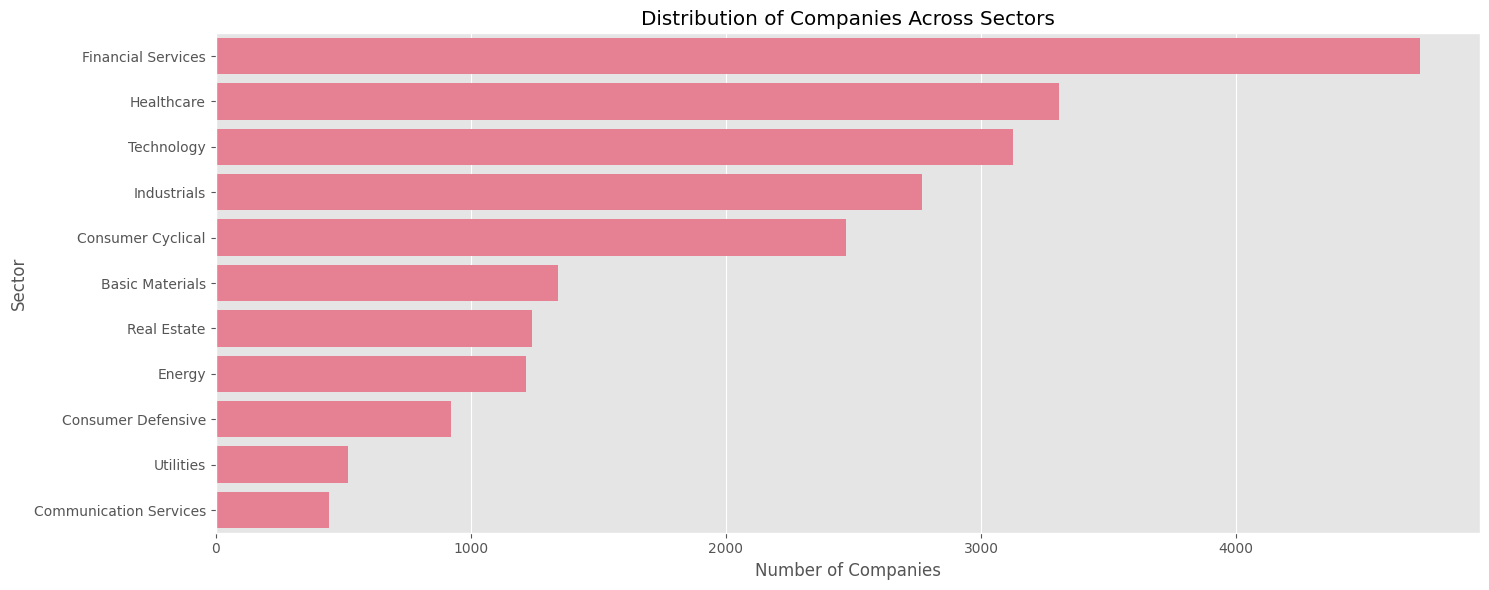

<Figure size 1000x600 with 0 Axes>

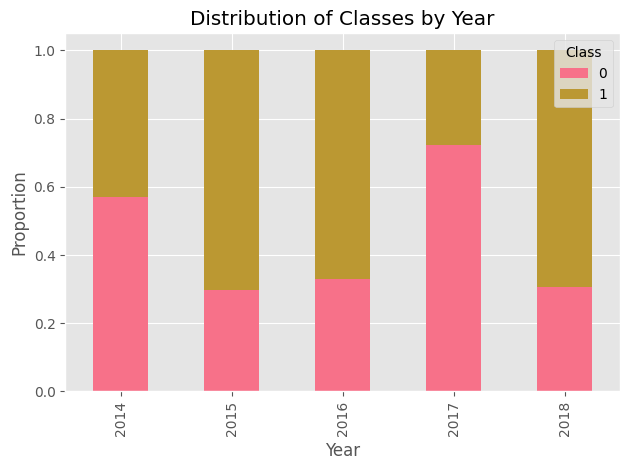


=== Basic Statistics ===
Total number of companies: 4980
Number of sectors: 11

Class distribution:
Class
1   55.080
0   44.920
Name: proportion, dtype: float64


In [5]:
# Load the data
data_frames, combined_df = load_financial_data()

# Analyze data quality
missing_info = analyze_data_quality(combined_df)

# Plot distributions
plot_data_distribution(combined_df)

# # Analyze key metrics
# analyze_key_metrics(combined_df)

# # Analyze financial ratios
# analyze_financial_ratios(combined_df)

# Display some basic statistics
print("\n=== Basic Statistics ===")
print(f"Total number of companies: {len(combined_df['Unnamed: 0'].unique())}")
print(f"Number of sectors: {len(combined_df['Sector'].unique())}")
print("\nClass distribution:")
print(combined_df['Class'].value_counts(normalize=True).mul(100).round(2))